# Things to be done visualize the data and find insights
Steps:
1. Load the data, clean and analyze 
2. Data visualization
3. Correlation
4. unique plot + better understanding
5. Ppt should be clear and precise

In [ ]:
# modules/libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1. Load the data, clean and analyze 

>  About dataset:
This dataset contains 3.682 records of courses taken from Udemy. Udemy is a massive online open course (MOOC) platform that offers both free and paid courses.
Courses included in this dataset come from four subject areas:
1. Web Development
2. Business Finance
3. Musical Instruments
4. Graphic Design



In [ ]:
# load the data
data = pd.read_csv('drive/My Drive/ACM ISM DHANBAD ML INTERNSHIP/resources/week1/udemy_courses.csv')

Note: Ensure both the dataset and file is at same location, else mention the path to the dataset.

In [ ]:
# shape of the data
data.shape

(3678, 12)

Note: As we previously seen about the dataset, it has 3678 entires with 12 different variable columns(attributes).

In [ ]:
# glance at the data
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Note: `.head()` fuction returns top 5 rows by default, and it helps to have a quick look at what kind of data is available.

### removing the unnecessary columns

In [ ]:
# removing the url column
# In data cleaning part we remove the unnecessary columns out

data.drop(columns =['url'], inplace = True)
data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### checking the unique subject value counts

In [ ]:
data['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

Note: This clearly shows that non of the subject name is wrongly entered

Suggestion: we can change the column name 'subject' to 'course name'
`data = data.rename({"subject":"course name"})`

Using the same code, we can repalce the wrongly spelt words with correct (if required)

### Check for the null values

In [ ]:
data.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Note: `.isnull()` return True/False wrt to the value is null/or not. Rather to check manually we can sum up them and find the null values.

As we can see there are no null values, incase of null present use `.dropna()`,
1. drop the entire row/col if the null frequecy is high.
2. Impute the values in nulls, either with mean/ mode/ median.

### checking the datatypes

In [ ]:
data.dtypes

course_id                int64
course_title            object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

Note: Sometimes the datatypes will missmatch the actual data, keenly observe and assign the datatypes to the data.

In [ ]:
data.describe()
# this gives the mean, std, count and some other values of Numerical  data

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [ ]:
data['published_timestamp'].min(), data['published_timestamp'].max()

('2011-07-09T05:43:31Z', '2017-07-06T21:46:30Z')

Note: We have the data collected between these timestamp i.e, from 2011 to 2017 if we generalize it with year

In [ ]:
# to have the details of Categorical, we can use
data.describe(include = "all")

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
count,3.678000e+03,3678,3678,3678.000000,3678.000000,3678.000000,3678.000000,3678,3678.000000,3678,3678
unique,NaN,3663,2,NaN,NaN,NaN,NaN,4,NaN,3672,4
top,NaN,Creating an animated greeting card via Google ...,True,NaN,NaN,NaN,NaN,All Levels,NaN,2016-05-16T18:28:30Z,Web Development
freq,NaN,3,3368,NaN,NaN,NaN,NaN,1929,NaN,2,1200
mean,6.759720e+05,NaN,NaN,66.049483,3197.150625,156.259108,40.108755,NaN,4.094517,NaN,NaN
std,3.432732e+05,NaN,NaN,61.005755,9504.117010,935.452044,50.383346,NaN,6.053840,NaN,NaN
min,8.324000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,4.076925e+05,NaN,NaN,20.000000,111.000000,4.000000,15.000000,NaN,1.000000,NaN,NaN
50%,6.879170e+05,NaN,NaN,45.000000,911.500000,18.000000,25.000000,NaN,2.000000,NaN,NaN
75%,9.613555e+05,NaN,NaN,95.000000,2546.000000,67.000000,45.750000,NaN,4.500000,NaN,NaN


Note: Here we're going in detail with each attributes meam/ std .`.describe()`fuctions returns the values for all columns combinely.

# 2. Data visualization 



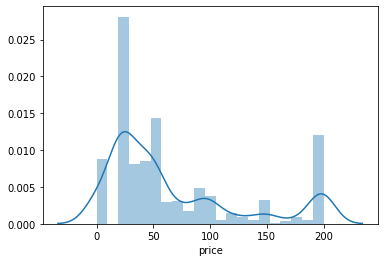

In [ ]:
#HISTOGRAM
import seaborn as sn
df1 = data
sn.distplot(df1['price']);

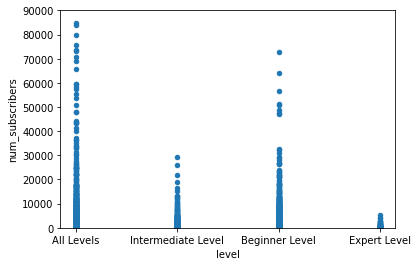

In [ ]:
#scatter plot for num_subscribers vs price

data = pd.concat([df1['num_subscribers'], df1['level']], axis=1)
data.plot.scatter(x='level', y='num_subscribers', ylim=(0,90000));

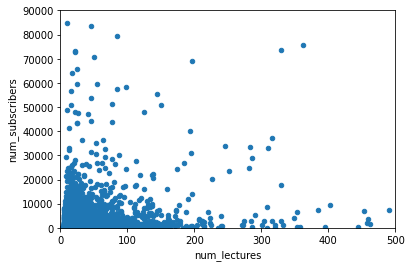

In [ ]:

#scatter plot num_subscribers/num_lectures

data = pd.concat([df1['num_subscribers'], df1['num_lectures']], axis=1)
data.plot.scatter(x='num_lectures', y='num_subscribers', xlim=(0,500) , ylim=(0, 90000));

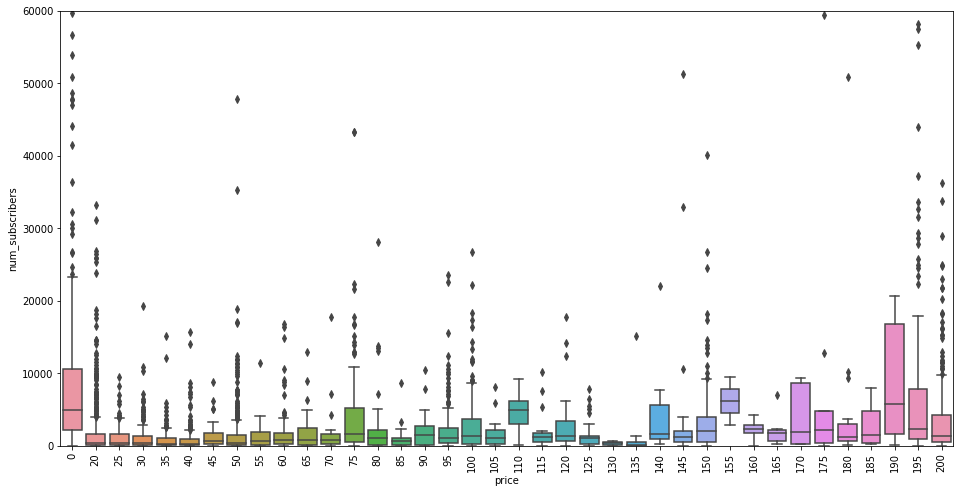

In [ ]:
#box plot for num_subscribers vs price

dataframe = pd.concat([df1['num_subscribers'], df1['price']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sn.boxplot(x="price", y="num_subscribers", data=dataframe)
fig.axis(ymin=0, ymax=60000);
plt.xticks(rotation=90);

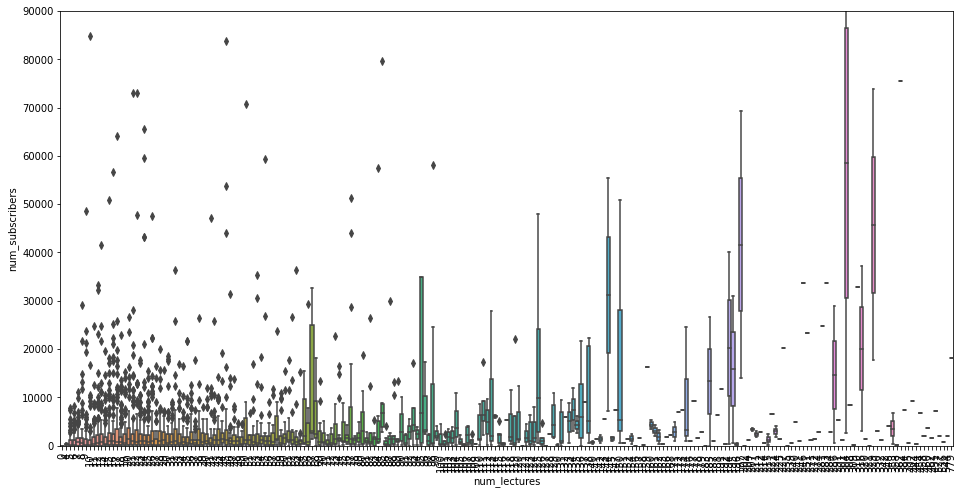

In [ ]:
#box plot for num_lectures vs num_subscribers

dataframe1 = pd.concat([df1['num_subscribers'], df1['num_lectures']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sn.boxplot(x="num_lectures", y="num_subscribers", data=dataframe1)
fig.axis(ymin=0, ymax=90000);
plt.xticks(rotation=90);

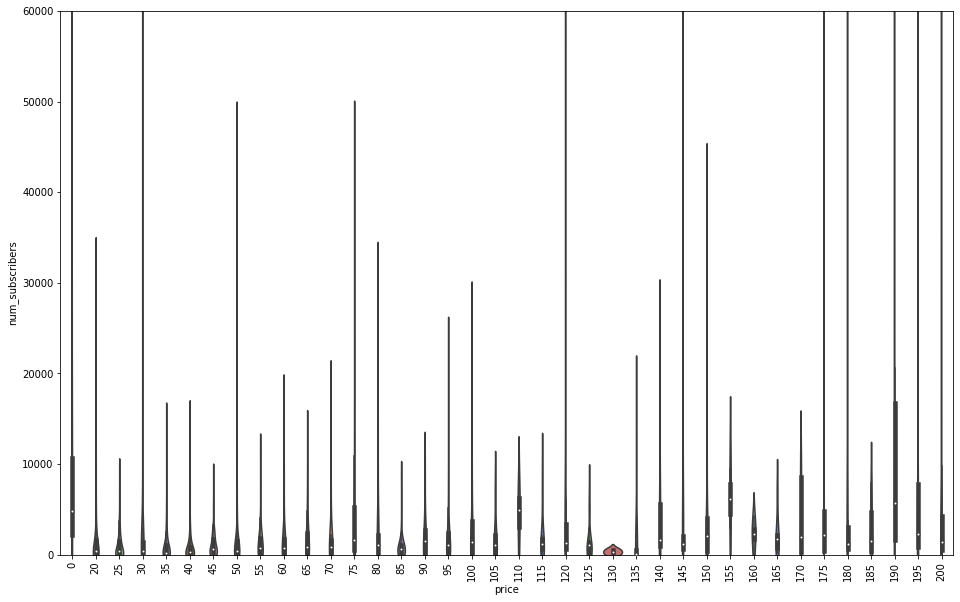

In [ ]:
#violin plot num_subscribers/price

dataframe = pd.concat([df1['num_subscribers'], df1['price']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sn.violinplot(x="price", y="num_subscribers", data=dataframe, palette="muted")
fig.axis(ymin=0, ymax=60000);
plt.xticks(rotation=90);

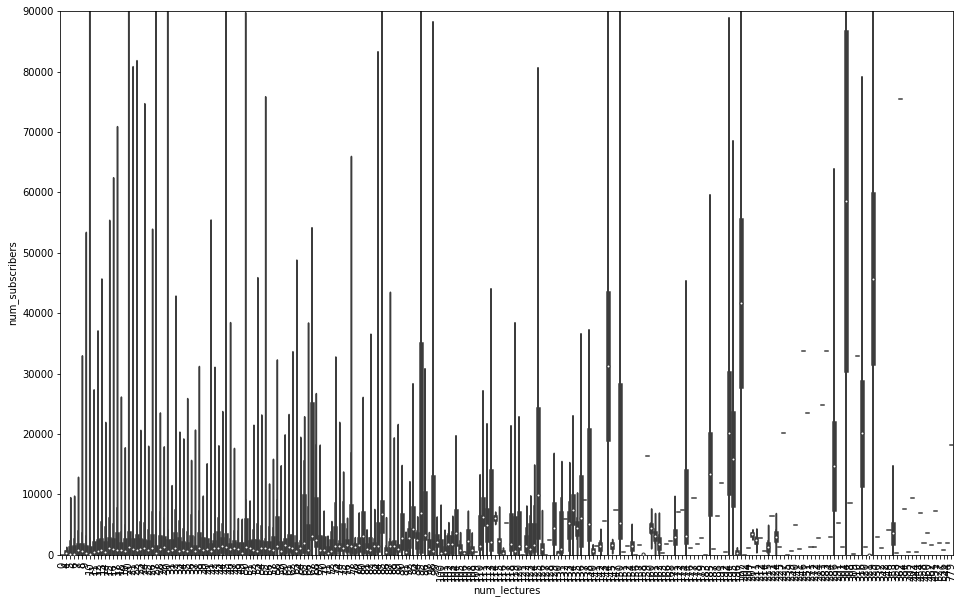

In [ ]:
dataframe = pd.concat([df1['num_subscribers'], df1['num_lectures']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sn.violinplot(x="num_lectures", y="num_subscribers", data=dataframe, palette="muted")
fig.axis(ymin=0, ymax=90000);
plt.xticks(rotation=90);

# 3. Correlation

In order to observe the correlation, we use another course dataset (harvard), and use the course_tile data, and we see the comparison with Udemy course data, here we can see various course titles in both the datasets.

Our main foucs is on the kind of courses taken by students

first we extracted the course_title and course_subjects form the harvard_courses.csv dataset and remaned them as new_var1, new_var2

after that we observed the uniques names in them and compared with the Udemy course dataset

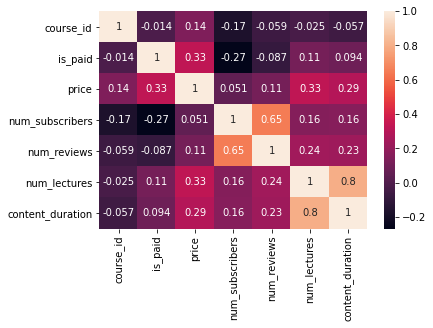

In [79]:
#realtionship analysis
corelation=data.corr()
sn.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [ ]:
# load the other dataset
data1 = pd.read_csv('drive/My Drive/ACM ISM DHANBAD ML INTERNSHIP/resources/week1/harvard_courses.csv')
data1.shape

(290, 23)

In [ ]:
data1.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,3003,15.04,8.32,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,5783,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,2082,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,5058,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


Note:  As the considered harvard_course dataset has the Dates with in range of the Udemy dataset, we futher dont need to impose the condition for date/time range.

In [ ]:
new_var1 = data1['Course Title']
new_var2 = data1['Course Subject']
new_var1,new_var2

(0                               Circuits and Electronics
 1       Introduction to Computer Science and Programming
 2                  Introduction to Solid State Chemistry
 3                       Introduction to Computer Science
 4      Health in Numbers: Quantitative Methods in Cli...
                              ...                        
 285                  First Nights: Symphonie Fantastique
 286       Introduction to Family Engagement in Education
 287                Introduction to Control System Design
 288                  Introduction to State Space Control
 289                       Magnetic Materials and Devices
 Name: Course Title, Length: 290, dtype: object,
 0      Science, Technology, Engineering, and Mathematics
 1                                       Computer Science
 2      Science, Technology, Engineering, and Mathematics
 3                                       Computer Science
 4                 Government, Health, and Social Science
                       

Note: the no of entries(290) in column correlate is less than actual no of rows in the Udemy dataset(3800).

In this situation 
1. we can either consider random 290 samples form the Udemy dataset and correlate
2. Impute random values into the correlate variable till it has 3800 rows (actual it has a high frequency of null/duplcates)

Its better to choose option 1

In [ ]:
data['correlate_title'] = pd.DataFrame(new_var1)
data['correlate_course'] = pd.DataFrame(new_var2)

In [ ]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,correlate,correlate_title,courelate_course,correlate_course
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,Circuits and Electronics,Circuits and Electronics,"Science, Technology, Engineering, and Mathematics","Science, Technology, Engineering, and Mathematics"
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,Introduction to Computer Science and Programming,Introduction to Computer Science and Programming,Computer Science,Computer Science
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,Introduction to Solid State Chemistry,Introduction to Solid State Chemistry,"Science, Technology, Engineering, and Mathematics","Science, Technology, Engineering, and Mathematics"
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,Introduction to Computer Science,Introduction to Computer Science,Computer Science,Computer Science
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,Health in Numbers: Quantitative Methods in Cli...,Health in Numbers: Quantitative Methods in Cli...,"Government, Health, and Social Science","Government, Health, and Social Science"


In [ ]:
data[['course_title', 'correlate_title']].head()

,course_title,correlate_title
0,Ultimate Investment Banking Course,Circuits and Electronics
1,Complete GST Course & Certification - Grow You...,Introduction to Computer Science and Programming
2,Financial Modeling for Business Analysts and C...,Introduction to Solid State Chemistry
3,Beginner to Pro - Financial Analysis in Excel ...,Introduction to Computer Science
4,How To Maximize Your Profits Trading Options,Health in Numbers: Quantitative Methods in Cli...


In [ ]:
data[['subject', 'correlate_course']].head()

,subject,correlate_course
0,Business Finance,"Science, Technology, Engineering, and Mathematics"
1,Business Finance,Computer Science
2,Business Finance,"Science, Technology, Engineering, and Mathematics"
3,Business Finance,Computer Science
4,Business Finance,"Government, Health, and Social Science"


In [ ]:
data['course_title'].value_counts(), data['correlate_title'].value_counts()

(Acoustic Blues Guitar Lessons                                   3
 Creating an animated greeting card via Google Slides            3
 Introduction to Forex Trading Business For Beginners            2
 Aprende a tocar el acordeón de botones                          2
 The Complete Web Developer Masterclass: Beginner To Advanced    2
                                                                ..
 Basel Norms (Basel 1/ Basel 2/ Basel 3) Simplified              1
 Build your own Beautiful Blog in WordPress + SEO                1
 HTML and CSS Foundations                                        1
 Economics for beginners - Various Concepts                      1
 Web Elements Design With Photoshop                              1
 Name: course_title, Length: 3663, dtype: int64,
 Introduction to Computer Science and Programming                                           8
 Introduction to Solid State Chemistry                                                      7
 Circuits and Electronics 

In [ ]:
data['subject'].value_counts(), data['correlate_course'].value_counts()

(Web Development        1200
 Business Finance       1195
 Musical Instruments     680
 Graphic Design          603
 Name: subject, dtype: int64,
 Humanities, History, Design, Religion, and Education    94
 Science, Technology, Engineering, and Mathematics       91
 Government, Health, and Social Science                  75
 Computer Science                                        30
 Name: correlate_course, dtype: int64)

# 4. 

In [ ]:
!pip install turicreate

     |████████████████████████████████| 91.9MB 58kB/s 
     |████████████████████████████████| 327kB 39.3MB/s 
     |████████████████████████████████| 86.3MB 47kB/s 
     |████████████████████████████████| 3.4MB 44.8MB/s 
     |████████████████████████████████| 450kB 45.8MB/s 
     |████████████████████████████████| 3.8MB 22.6MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=1acc077d711fa09a5b1ebc8b5193007dc3b7b783b57a895dc6bde7cd937ecd90
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=61d9051095df4f70eabf700324bf79daac1f7a0f0c0f3ad13f2f29196723cc9e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Fo

In [ ]:
# SFrame Visualization
import turicreate
sf1 = turicreate.SFrame('drive/My Drive/ACM ISM DHANBAD ML INTERNSHIP/resources/week1/udemy_courses.csv')
sf2 = turicreate.SFrame('drive/My Drive/ACM ISM DHANBAD ML INTERNSHIP/resources/week1/harvard_courses.csv')

Finished parsing file /content/drive/My Drive/ACM ISM DHANBAD ML INTERNSHIP/resources/week1/udemy_courses.csv

Parsing completed. Parsed 100 lines in 0.102318 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/ACM ISM DHANBAD ML INTERNSHIP/resources/week1/udemy_courses.csv

Parsing completed. Parsed 3678 lines in 0.030372 secs.

Finished parsing file /content/drive/My Drive/ACM ISM DHANBAD ML INTERNSHIP/resources/week1/harvard_courses.csv

Parsing completed. Parsed 100 lines in 0.017116 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,int,int,int,int,int,float,float,float,str,float,float,float,float,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/ACM ISM DHANBAD ML INTERNSHIP/resources/week1/harvard_courses.csv

Parsing completed. Parsed 290 lines in 0.016645 secs.

In [ ]:
sf1.show()


Materializing SFrame

In [ ]:
sf2.show()

Materializing SFrame

In [ ]:
# as we want to correlate the Subjects(Course)
sf1['subject'].show()

Materializing SArray

In [ ]:
sf2['Course Subject'].show()

Materializing SArray

Note: from the above two plots we can observe the frequency of course subject, subcribed in both Udemy_courses and Harvard courses